In [1]:
import tradingeconomics as te
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
import mplfinance as mpf
import matplotlib.dates as mpl_dates
from datetime import datetime
import json
import urllib
import sys
from datetime import *
from tradingeconomics import glob
import ssl
from urllib.request import urlopen

In [2]:
te.login('jupyter:jupyter') # Signup for a free API key at https://developer.tradingeconomics.com/

'You are logged in as a jupyter:jupyter'

## Commodities performances by Group - 2010 - 2020

In [3]:
def get_category_groups():
    symbols_dct = {}
    df = te.getMarketsData('commodities', 'df')
    grouped_colum_group = df.groupby(["Group"]).sum()
    list_of_groups= grouped_colum_group.index
    for item in list_of_groups:
        df2 = df[['Symbol','Group']].query(f'Group == "{item}"')
        x = df2['Symbol']
        y =x.to_dict()
        group_symbols = y.values()
        symbols_dct[item] = group_symbols
    return symbols_dct.keys()


def get_symbols(group_name):

    def get_symbols_dct():
        symbols_dct = {}
        df = te.getMarketsData('commodities', 'df')
        grouped_colum_group = df.groupby(["Group"]).sum()
        list_of_groups= grouped_colum_group.index
        for item in list_of_groups:
            df2 = df[['Symbol','Group']].query(f'Group == "{item}"')
            x = df2['Symbol']
            y =x.to_dict()
            group_symbols = y.values()
            symbols_dct[item] = group_symbols
        return symbols_dct

    commodities_dict = get_symbols_dct()

    return commodities_dict[group_name]

def getCmtName(symbol_list):
    name_list = []
    unit_list = []
    decimals_list = []
    linkAPI = f'https://api.tradingeconomics.com/markets/commodities?c={glob.apikey}'
    response = urlopen(linkAPI)
    code = response.getcode()
    webResults = json.loads(response.read().decode('utf-8'))
    maindf = pd.DataFrame(webResults)
    for symbol in symbol_list:
        symbol_name = maindf.query(f'Symbol == "{symbol}"')
        name_list.append(symbol_name['Name'].values)
        unit_list.append(symbol_name['unit'].values)
        decimals_list.append(symbol_name['decimals'].values)
    dict_map = {
            "name_list": [name_list],
            "unit_list": [unit_list],
            "decimals_list": [decimals_list]
            }
    return dict_map
    
def getHistoricalData(symbol_list, initDate, endDate):
    dataframe_list = []
    for symbol in symbol_list:
        dataframe_list.append(te.fetchMarkets(symbol = symbol, initDate = initDate, endDate = endDate, output_type='df'))
    return dataframe_list
    
        
def plot(dataframe_list, symbol_list, dict_map):
    plt.rcParams.update({'figure.autolayout': True})
    fig, axs = plt.subplots(len(symbol_list), 1, figsize=(15, 30))
    i = 0
    for dataframe in dataframe_list:
        axs[i].plot(dataframe['close'], label = dict_map['unit_list'][0][i])
        axs[i].set_title(f"{dict_map['name_list'][0][i]}", fontsize=20, fontweight='bold')
        legend = axs[i].legend(loc='lower left', shadow=True, fontsize='x-large')
        legend.get_frame().set_facecolor('C0')
        axs[i].grid()
        i += 1

def get_static_plot(stock_df,symbol_list,dict_map):
    plt.style.use('bmh')
#     plt.rcParams.update({'figure.autolayout': True})
    fig, ax = plt.subplots(figsize=(20,10))  # Create a figure and an axes.
    i = 0
    for df in stock_df:
        ax.plot(df['close'], label=dict_map['name_list'][0][i])  # Plot some data on the axes.
        i += 1
        

    ax.set_xlabel('Date')  # Add an x-label to the axes.
    ax.set_ylabel('')  # Add a y-label to the axes.
    ax.set_title("Moving Average ")  # Add a title to the axes.
    ax.legend(fontsize='x-large')  # Add a legend.

def get_cmt_historical_comparison_performance(commodities_group, initDate, endDate):
    symbol_list = get_symbols(commodities_group)
    dataframe_list = getHistoricalData(symbol_list, initDate, endDate)
    dict_map = getCmtName(symbol_list)
    plot(dataframe_list, symbol_list, dict_map)
#     get_static_plot(dataframe_list, symbol_list, dict_map)


#### Category Group Options:
The below function get the current options for category group. 


In [4]:
get_category_groups()

dict_keys(['Agricultural', 'Energy', 'Index', 'Industrial', 'Livestock', 'Metals', 'industrial'])

#### Getting the Plot
Choose a commodity group from the list above
Pass it to the below function

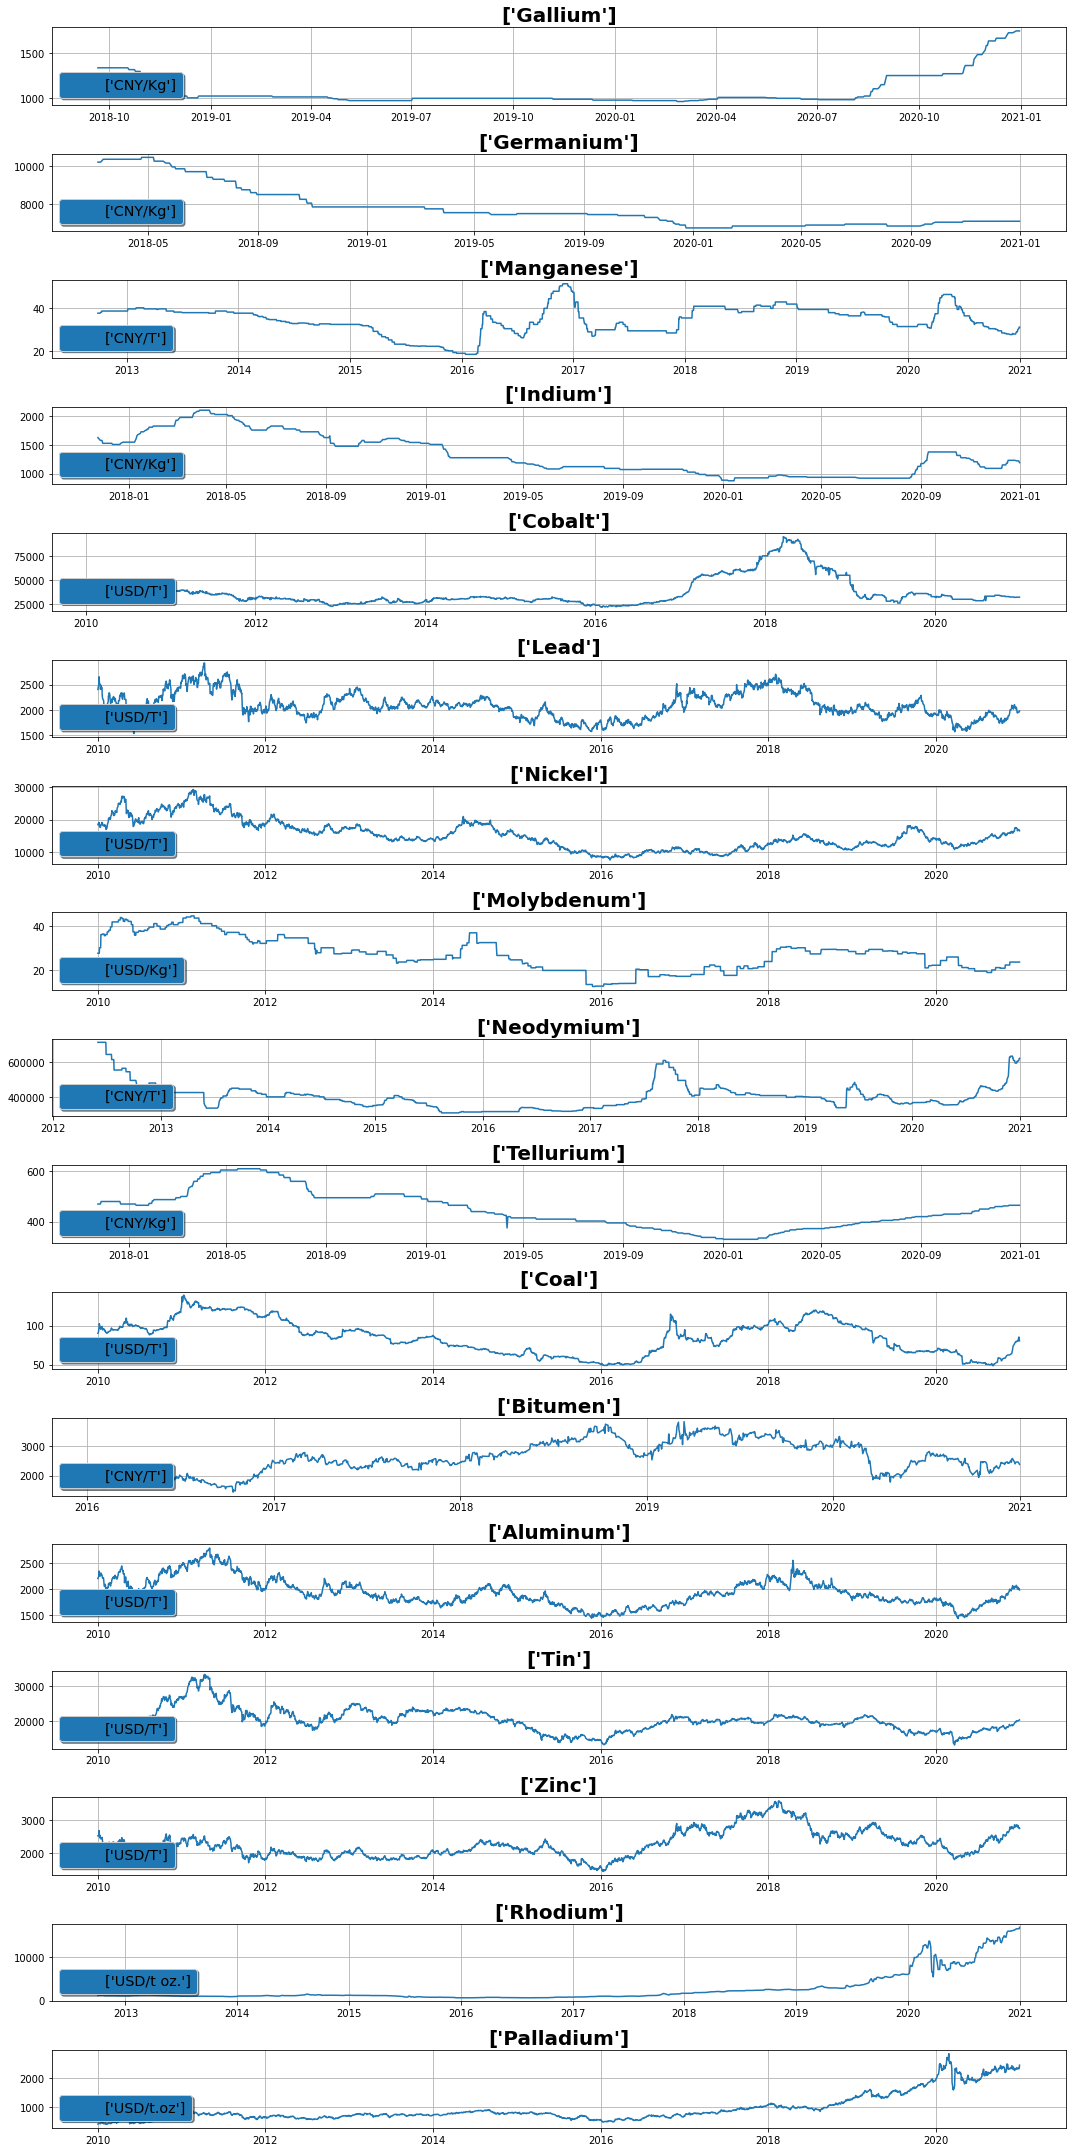

In [5]:
commodities_group = 'Industrial'
initDate = '2010-01-01'
endDate = '2020-12-31'
get_cmt_historical_comparison_performance(commodities_group, initDate, endDate)

## Commodities Perfomance Comparison with the same measure unit

In [6]:
def get_category_groups():
    symbols_dct = {}
    df = te.getMarketsData('commodities', 'df')
    grouped_colum_group = df.groupby(["Group"]).sum()
    list_of_groups= grouped_colum_group.index
    for item in list_of_groups:
        df2 = df[['Symbol','Group']].query(f'Group == "{item}"')
        x = df2['Symbol']
        y =x.to_dict()
        group_symbols = y.values()
        symbols_dct[item] = group_symbols
    return symbols_dct.keys()


def get_symbols(group_name):

    def get_symbols_dct():
        symbols_dct = {}
        df = te.getMarketsData('commodities', 'df')
        grouped_colum_group = df.groupby(["Group"]).sum()
        list_of_groups= grouped_colum_group.index
        for item in list_of_groups:
            df2 = df[['Symbol','Group']].query(f'Group == "{item}"')
            x = df2['Symbol']
            y =x.to_dict()
            group_symbols = y.values()
            symbols_dct[item] = group_symbols
        return symbols_dct

    commodities_dict = get_symbols_dct()

    return commodities_dict[group_name]

def getCmtName(symbol_list):
    name_list = []
    unit_list = []
    decimals_list = []
    linkAPI = f'https://api.tradingeconomics.com/markets/commodities?c={glob.apikey}'
    response = urlopen(linkAPI)
    code = response.getcode()
    webResults = json.loads(response.read().decode('utf-8'))
    maindf = pd.DataFrame(webResults)
    for symbol in symbol_list:
        symbol_name = maindf.query(f'Symbol == "{symbol}"')
        name_list.append(symbol_name['Name'].values)
        unit_list.append(symbol_name['unit'].values)
        decimals_list.append(symbol_name['decimals'].values)
    dict_map = {
            "name_list": [name_list],
            "unit_list": [unit_list],
            "decimals_list": [decimals_list]
            }
    return dict_map
    
def getHistoricalData(symbol_list, initDate, endDate):
    dataframe_list = []
    for symbol in symbol_list:
        dataframe_list.append(te.fetchMarkets(symbol = symbol, initDate = initDate, endDate = endDate, output_type='df'))
    return dataframe_list
    
        
def plot(dataframe_list, symbol_list, dict_map):
    plt.rcParams.update({'figure.autolayout': True})
    fig, axs = plt.subplots(len(symbol_list), 1, figsize=(15, 30))
    i = 0
    for dataframe in dataframe_list:
        axs[i].plot(dataframe['close'], label = dict_map['unit_list'][0][i])
        axs[i].set_title(f"{dict_map['name_list'][0][i]}", fontsize=20, fontweight='bold')
        legend = axs[i].legend(loc='lower left', shadow=True, fontsize='x-large')
        legend.get_frame().set_facecolor('C0')
        axs[i].grid()
        i += 1

def get_static_plot(stock_df,symbol_list,dict_map):
    plt.style.use('bmh')
#     plt.rcParams.update({'figure.autolayout': True})
    fig, ax = plt.subplots(figsize=(20,10))  # Create a figure and an axes.
    i = 0
    for df in stock_df:
        ax.plot(df['close'], label=dict_map['name_list'][0][i])  # Plot some data on the axes.
        i += 1
        

    ax.set_xlabel('Date')  # Add an x-label to the axes.
    ax.set_ylabel(dict_map['unit_list'][0][0])  # Add a y-label to the axes.
    ax.set_title("Performance Comparison ")  # Add a title to the axes.
    ax.legend(fontsize='x-large')  # Add a legend.

def get_cmt_historical_comparison_performance_same_unit(commodities_group, initDate, endDate):
#     symbol_list = get_symbols(commodities_group)
    symbol_list = commodities_group
    dataframe_list = getHistoricalData(symbol_list, initDate, endDate)
    dict_map = getCmtName(symbol_list)
#     plot(dataframe_list, symbol_list, dict_map)
    get_static_plot(dataframe_list, symbol_list, dict_map)


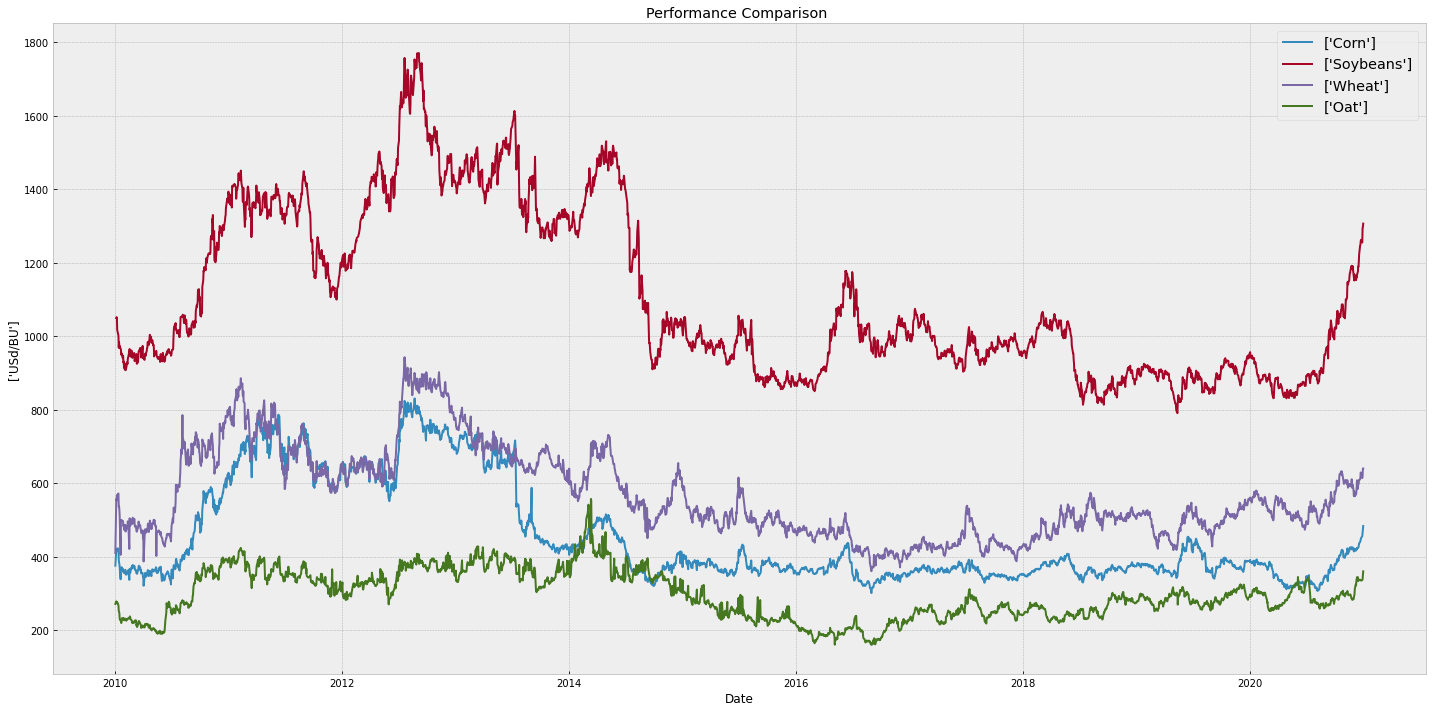

In [7]:
commodities_group = ['C 1:COM', 'S 1:COM','W 1:COM','O 1:COM']
initDate = '2010-01-01'
endDate = '2020-12-31'
get_cmt_historical_comparison_performance_same_unit(commodities_group, initDate, endDate)

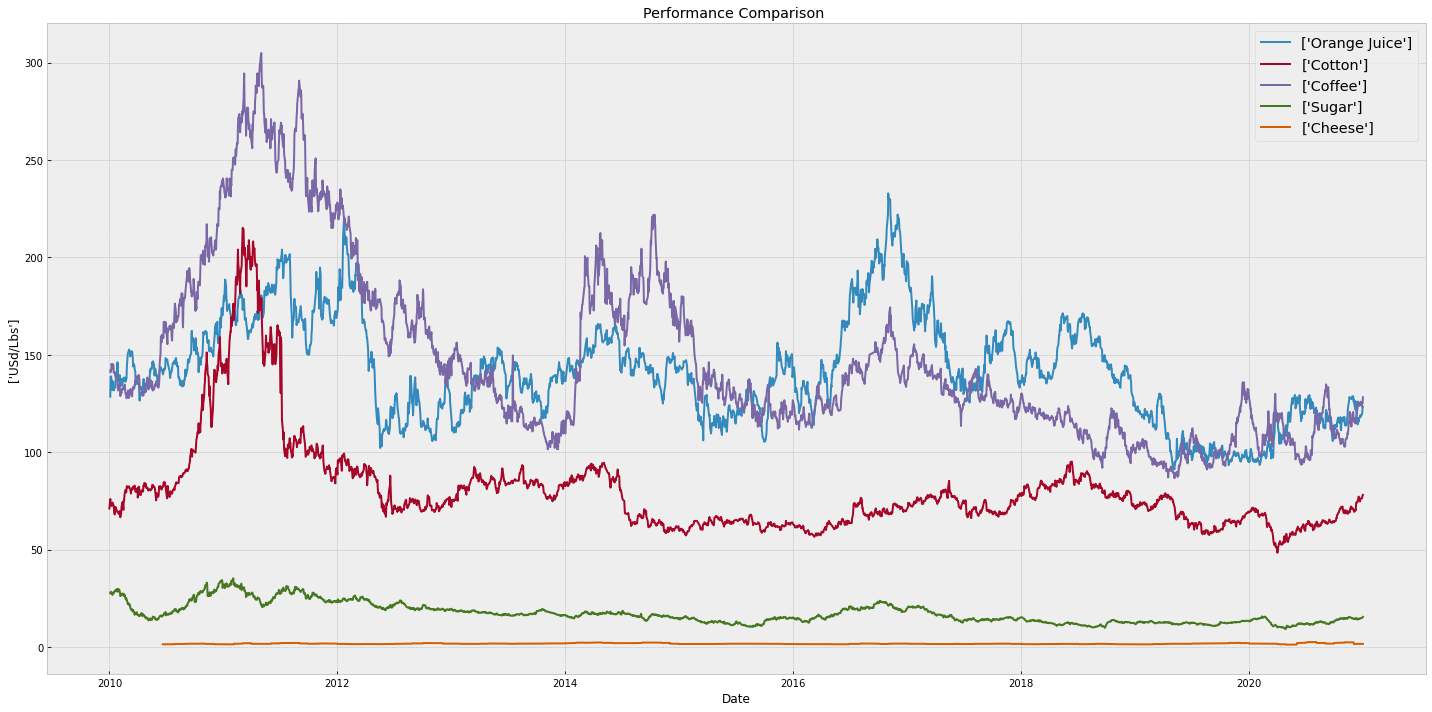

In [8]:
commodities_group = ['JO1:COM', 'CT1:COM','KC1:COM','SB1:COM','CHE:COM']
initDate = '2010-01-01'
endDate = '2020-12-31'
get_cmt_historical_comparison_performance_same_unit(commodities_group, initDate, endDate)

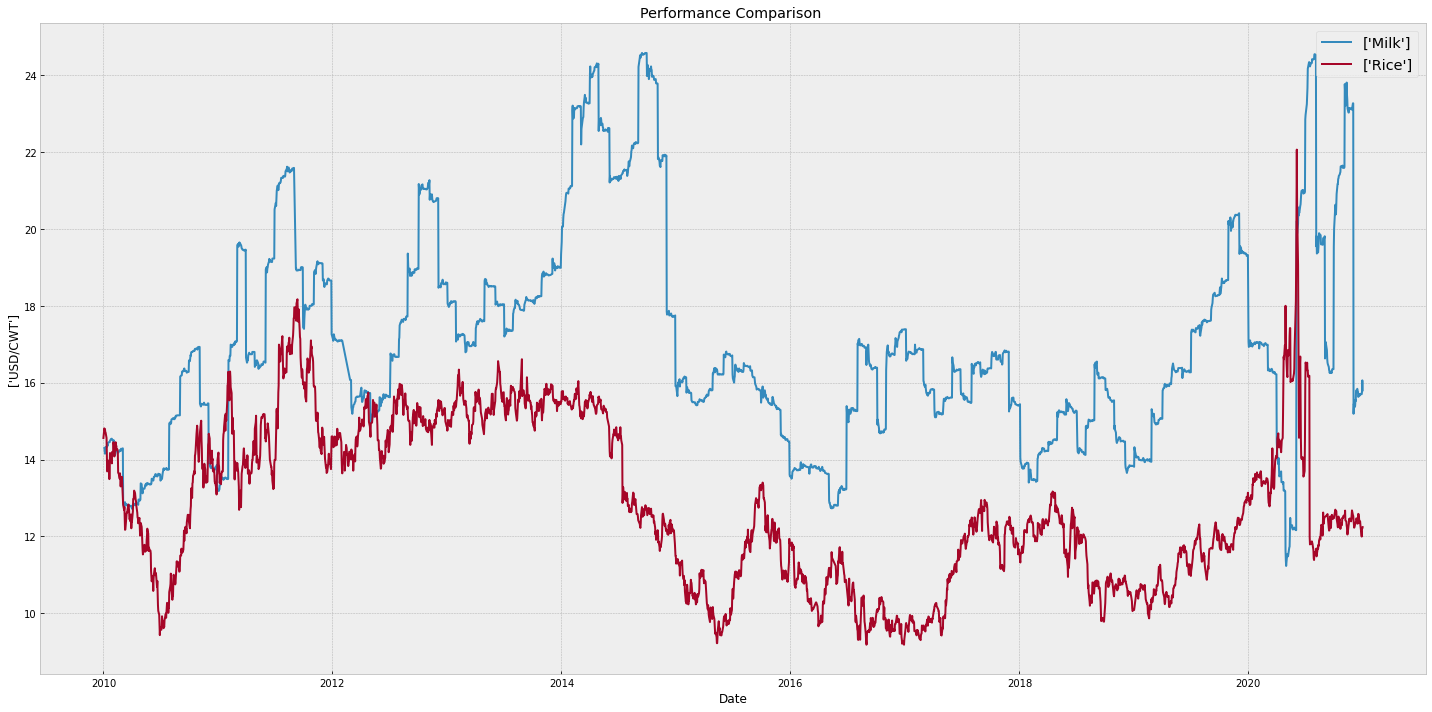

In [9]:
commodities_group = ['DA:COM', 'RR1:COM']
initDate = '2010-01-01'
endDate = '2020-12-31'
get_cmt_historical_comparison_performance_same_unit(commodities_group, initDate, endDate)